#### **Bước 1. Phân tích các phương thức có trong chương trinh**
**Bài toán:** Có vẻ như một tin nhắn được mã hóa khác đã bị chặn. Người mã hóa có vẻ đã học được bài học của mình và bây giờ không có dấu chấm câu nào! Bạn vẫn có thể giải mã được chứ?

**Hint:** Hãy thử tinh chỉnh cuộc tấn công tần số (frequency attack), có thể việc phân tích các nhóm chữ cái sẽ cải thiện kết quả?

**Phân tích**
- Chú ý, bài toán sử dụng mã hóa thay thế, không kể chữ hoa chữ thường, tức là, `k -> c` thì `K -> C`
- Tiếp theo, các ký tự không phải chữ cái được giữ nguyên


**`Frequency attack (hay còn gọi là frequency analysis - phân tích tần suất):`** Là một phương pháp tấn công mật mã học nhằm phá vỡ các hệ thống mã hóa dựa trên sự phân bố tần suất của các ký tự trong ngôn ngữ tự nhiên. Đây là một kỹ thuật được sử dụng để phá vỡ các mã hóa đơn giản như mã thay thế đơn (substitution cipher) hoặc Caesar cipher.

**Nguyên tắc của frequency attack:**
- ***Tần suất xuất hiện của các ký tự:*** Trong bất kỳ ngôn ngữ nào, một số ký tự xuất hiện thường xuyên hơn những ký tự khác. Ví dụ, trong tiếng Anh, các chữ cái 'E', 'T', 'A', 'O', 'I' là những chữ cái phổ biến nhất.

- ***Mã hóa không thay đổi tần suất:*** Trong các hệ thống mã hóa đơn giản (ví dụ: Caesar cipher, mã thay thế), mặc dù các ký tự trong thông điệp gốc bị thay thế bởi các ký tự khác, tần suất xuất hiện của các ký tự vẫn không thay đổi. Điều này có nghĩa là chữ cái phổ biến nhất trong thông điệp mã hóa có khả năng cao là đại diện cho chữ cái phổ biến nhất trong ngôn ngữ ban đầu (ví dụ: 'E' trong tiếng Anh).

- ***Sử dụng phân tích tần suất:*** Bằng cách tính tần suất xuất hiện của các ký tự trong thông điệp mã hóa và so sánh với tần suất xuất hiện phổ biến của các chữ cái trong ngôn ngữ đó, kẻ tấn công có thể suy đoán về các ký tự đã được thay thế, từ đó giải mã được thông điệp.

**Bảng tấn suất ký tự tiếng Anh**
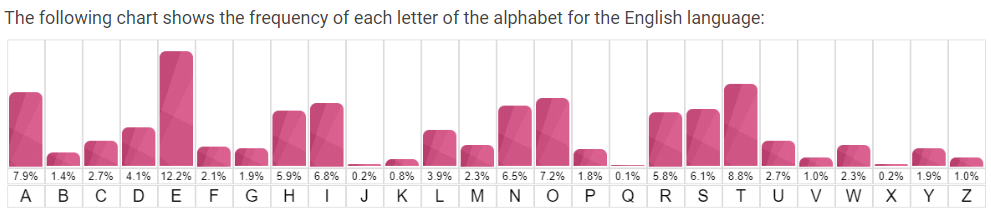
E, T, A và O là phổ biến nhất, trong khi Z, Q, X và J là hiếm. Tương tự như vậy, TH, ER, ON và AN là những cặp chữ cái phổ biến nhất (gọi là bigram hoặc digraph), và SS, EE, TT và FF là những sự lặp lại phổ biến nhất

##### ***1.1. Đếm tấn suất ký tự trong file mã hóa***
Viết phương thức đếm ký tự từ một file

In [19]:
import string

# Thực hiện:
frequency_En = ['e', 't', 'a', 'o', 'i', 'n', 's', 'h', 'r', 'd', 'l', 'c', 'u', 'm', 'w', 'f', 'g', 'y', 'p', 'b', 'v', 'k', 'j', 'x', 'q', 'z']

cipher = ""
with open('message.txt', 'r') as file:
    lines = file.readlines()

for line in lines:
    cipher += line.strip()
# print(cipher)

def frequency_characters(text):
    char_count = {}
    
    for char in text:
        if char.isalpha(): 
            char = char.lower()  
            if char in char_count:
                char_count[char] += 1
            else:
                char_count[char] = 1
    
    return char_count

def most_frequent_characters(fre_dict_char):
    # Sắp xếp các ký tự theo giá trị xuất hiện nhiều nhất (giảm dần)
    sorted_characters = sorted(fre_dict_char.keys(), key=lambda char: fre_dict_char[char], reverse=True)
    sorted_frequencies = [fre_dict_char[char] for char in sorted_characters]
    
    return sorted_characters, sorted_frequencies

most_fre_chars, num_fre_chars = most_frequent_characters(frequency_characters(cipher))
print(frequency_En)
print(most_fre_chars)


['e', 't', 'a', 'o', 'i', 'n', 's', 'h', 'r', 'd', 'l', 'c', 'u', 'm', 'w', 'f', 'g', 'y', 'p', 'b', 'v', 'k', 'j', 'x', 'q', 'z']
['j', 'f', 'q', 'm', 'g', 's', 'x', 'k', 'd', 'n', 'w', 'a', 'l', 'u', 'y', 'v', 'e', 'p', 't', 'h', 'c', 'o', 'z', 'i']


In [20]:
flag_enc  = "vqkmKFL{G6D4U_4G41T515_15_73Y10A5_42JX1770}"
flag_form = "picoCTF{*6*4*_4*41*515_15_73*10*5_42E*1770}"
# Suy ra: p -> v; i -> q; c -> k; o -> m; t -> f; f -> l

# Ta có mảng thay thế một số chữ:
original_chars = string.ascii_lowercase
#                "abcdefghijklmnopqrstuvwxyz"
encrypts_chars = "xhkyjlenqbowugmvidsfapcztr"
char_mapping = {encrypts_chars[i]: original_chars[i] for i in range(len(original_chars)) if encrypts_chars[i] != '*'}
print(char_mapping)

def decrypt_message(cipher, char_map):
    res = []
    for char in cipher:
        if char in char_mapping:
            res.append(char_mapping[char])  # Thay thế ký tự
        elif char.isupper():  # Nếu ký tự là chữ hoa
            if char.lower() not in char_mapping:
                res.append('*')
            else:
                res.append(char_mapping[char.lower()].upper())
        elif char.isalpha():
            res.append('*')
        else:
            res.append(char)  # Giữ nguyên ký tự không phải chữ cái

    return ''.join(res)
print(cipher)
print(decrypt_message(cipher, char_mapping))

{'x': 'a', 'h': 'b', 'k': 'c', 'y': 'd', 'j': 'e', 'l': 'f', 'e': 'g', 'n': 'h', 'q': 'i', 'b': 'j', 'o': 'k', 'w': 'l', 'u': 'm', 'g': 'n', 'm': 'o', 'v': 'p', 'i': 'q', 'd': 'r', 's': 's', 'f': 't', 'a': 'u', 'p': 'v', 'c': 'w', 'z': 'x', 't': 'y', 'r': 'z'}
fnjdjjzqsfsjpjdxwmfnjdcjwwjsfxhwqsnjynqensknmmwkmuvafjdsjkadqftkmuvjfqfqmgsqgkwayqgekthjdvxfdqmfxgyaskthjdknxwwjgejfnjsjkmuvjfqfqmgslmkasvdquxdqwtmgstsfjusxyuqgqsfdxfqmglagyxujgfxwscnqknxdjpjdtasjlawxgyuxdojfxhwjsoqwwsnmcjpjdcjhjwqjpjfnjvdmvjdvadvmsjmlxnqensknmmwkmuvafjdsjkadqftkmuvjfqfqmgqsgmfmgwtfmfjxknpxwaxhwjsoqwwshafxwsmfmejfsfayjgfsqgfjdjsfjyqgxgyjzkqfjyxhmafkmuvafjdskqjgkjyjljgsqpjkmuvjfqfqmgsxdjmlfjgwxhmdqmasxllxqdsxgykmujymcgfmdaggqgeknjkowqsfsxgyjzjkafqgekmglqeskdqvfsmlljgsjmgfnjmfnjdnxgyqsnjxpqwtlmkasjymgjzvwmdxfqmgxgyquvdmpqsxfqmgxgymlfjgnxsjwjujgfsmlvwxtcjhjwqjpjxkmuvjfqfqmgfmaknqgemgfnjmlljgsqpjjwjujgfsmlkmuvafjdsjkadqftqsfnjdjlmdjxhjffjdpjnqkwjlmdfjknjpxgejwqsufmsfayjgfsqgxujdqkxgnqensknmmwsladfnjdcjhjwqjpjfnxfxgag

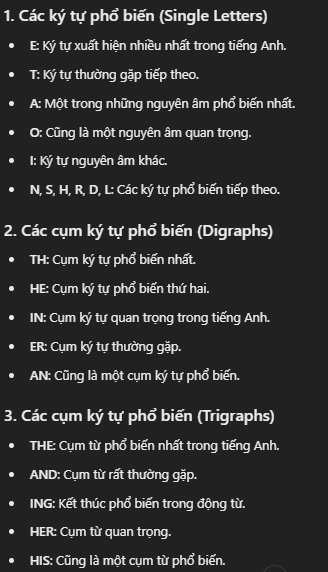

Nhìn vào đây, ta thấy cụm `tne` giống với từ `the`, thường xuất hiện nhiều trong tiếng anh. Suy ra, `h -> n`

Tiếp theo, từ `ezist` giống với từ `exist`, có thể suy ra `s -> s` và `x -> z`, ... cứ tiếp tục phân tích. Ta thu được bảng thế
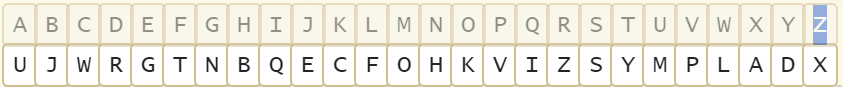

Link công cụ: https://www.dcode.fr/monoalphabetic-substitution